In [102]:
#groupby()메서드 사용 
from pandas import Series, DataFrame
import numpy as np 

df = DataFrame({'key1':['a','a','b','b','a'], 
                'key2':['one','two','one','two','one'], 
                'data1':np.random.randn(5), 
                'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.618986,1.924334
1,a,two,2.406597,-1.712550
2,b,one,0.532525,-0.124853
3,b,two,-0.595371,-0.823329
4,a,one,-0.685282,-1.077047


In [103]:
grouped = df.groupby("key2")["data2"]
grouped

In [104]:
print( grouped.mean() )
print( grouped.sum() )
print( grouped.count() )

key2
one    0.240811
two   -1.267940
Name: data2, dtype: float64
key2
one    0.722434
two   -2.535879
Name: data2, dtype: float64
key2
one    3
two    2
Name: data2, dtype: int64


In [105]:
#복합키컬럼을 사용하는 경우: 연속으로 함수, 메서드 호출(메서드체인)
means = df.groupby( ["key2","key1"] )["data1"].sum()
means

key2  key1
one   a      -0.066296
      b       0.532525
two   a       2.406597
      b      -0.595371
Name: data1, dtype: float64

In [106]:
#학급 성적 
dfClass = DataFrame({"학급":[1,1,2,2,1], 
                     "이름":["홍길동","전우치","이순신","박문수","김길동"],
                     "국어":[100,90,95,100,80], 
                     "영어":[80,90,95,92,89], 
                     "수학":[90,80,92,100,80]
                     })

dfClass

,학급,이름,국어,영어,수학
0,1,홍길동,100,80,90
1,1,전우치,90,90,80
2,2,이순신,95,95,92
3,2,박문수,100,92,100
4,1,김길동,80,89,80


In [107]:
#합계
sum(dfClass["국어"])

465

In [108]:
#평균
sum(dfClass["국어"])/5

93.0

In [109]:
#오름차순
dfClass.sort_values("국어")

,학급,이름,국어,영어,수학
4,1,김길동,80,89,80
1,1,전우치,90,90,80
2,2,이순신,95,95,92
0,1,홍길동,100,80,90
3,2,박문수,100,92,100


In [110]:
#내림차순
dfClass.sort_values("국어", ascending=False)

,학급,이름,국어,영어,수학
0,1,홍길동,100,80,90
3,2,박문수,100,92,100
2,2,이순신,95,95,92
1,1,전우치,90,90,80
4,1,김길동,80,89,80


In [111]:
#새로운 컬럼 추가하기
dfClass["전체"] = dfClass["국어"] + dfClass["수학"] + dfClass["영어"]

In [112]:
#평균을 추가하기 
dfClass["평균"] = (dfClass["국어"] + dfClass["수학"] + dfClass["영어"])/3

In [113]:
dfClass

,학급,이름,국어,영어,수학,전체,평균
0,1,홍길동,100,80,90,270,90.000000
1,1,전우치,90,90,80,260,86.666667
2,2,이순신,95,95,92,282,94.000000
3,2,박문수,100,92,100,292,97.333333
4,1,김길동,80,89,80,249,83.000000


In [114]:
#내림차순 정렬하기 
dfClass.sort_values("평균", ascending=False)

,학급,이름,국어,영어,수학,전체,평균
3,2,박문수,100,92,100,292,97.333333
2,2,이순신,95,95,92,282,94.000000
0,1,홍길동,100,80,90,270,90.000000
1,1,전우치,90,90,80,260,86.666667
4,1,김길동,80,89,80,249,83.000000


In [115]:
#학급별로 그룹핑하기 
dfClass.groupby("학급")["국어"].mean()

학급
1    90.0
2    97.5
Name: 국어, dtype: float64

In [116]:
dfClass.agg(수학평균=("수학","mean"))

,수학
수학평균,88.4


In [117]:
dfClass.groupby("학급").agg(수학평균=("수학","mean"))
        

,수학평균
학급,
1,83.333333
2,96.000000


In [118]:
dfClass.groupby("학급").agg(국어평균=("국어","mean"), 
            수학평균=("수학","mean"),
            영어평균=("영어","mean"), 
            갯수=("학급","count")).round(2)

,국어평균,수학평균,영어평균,갯수
학급,,,,
1,90.0,83.33,86.33,3
2,97.5,96.00,93.50,2


Text(0.5, 1.0, 'sine wave')

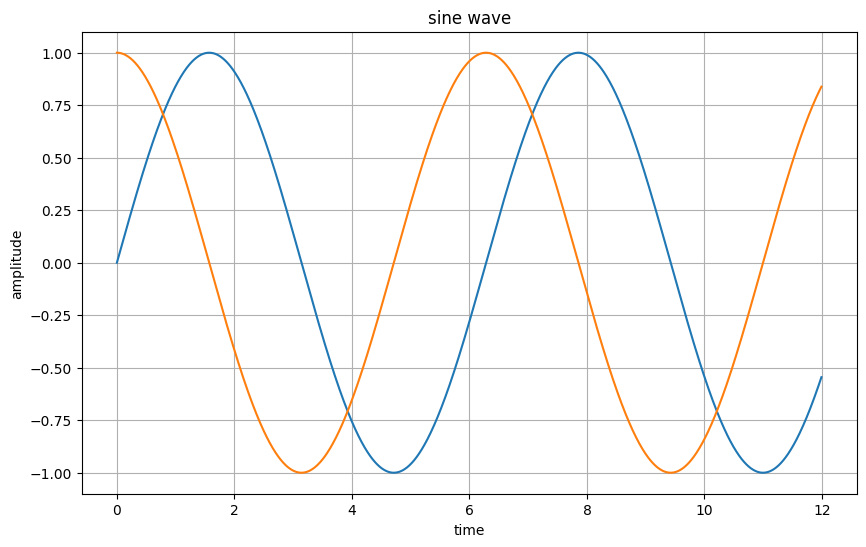

In [119]:
#차트출력
import matplotlib.pyplot as plt
#매직명령어
%matplotlib inline
import numpy as np

t=np.arange(0, 12, 0.01)
y=np.sin(t)

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("sine wave")

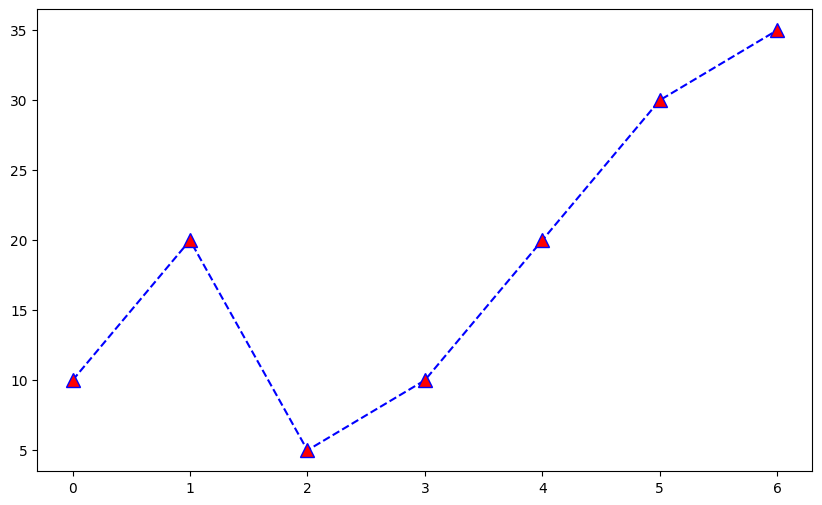

In [124]:
plt.figure(figsize=(10, 6))

t=[0,1,2,3,4,5,6]
y=[10,20,5,10,20,30,35]

#마커든 강조하는 표시(o,s,>,^)
plt.plot(t,y, color="blue",linestyle="dashed", marker="^", markersize=10, markerfacecolor="red")